## ModuloA

In [1]:
using PyPlot
using SymPy

In [2]:
push!(LOAD_PATH,"/home/eve/Documents/Matematicas/Proyectos/Implementacion")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/eve/Documents/Matematicas/Proyectos/Implementacion"

In [3]:
using PeriodicosSymmetries

┌ Info: Precompiling PeriodicosSymmetries [top-level]
└ @ Base loading.jl:1260


In [10]:
function composition2(f,n)
    if n==1
        return f
    else
        return ∘(ntuple(_ -> f, n)...)
    end
end

composition2 (generic function with 1 method)

In [13]:
composition2(f,1)

f (generic function with 1 method)

In [4]:
composition(f, n) = ∘(ntuple(_ -> f, n)...) 

composition (generic function with 1 method)

In [5]:
f(x) = 2*x

f (generic function with 1 method)

In [7]:
composition(f,2)

#64 (generic function with 1 method)

🔵 Definimos el mapeo

In [4]:
function EstandardMap(r)
    x = r[1]
    y = r[2]
    vx = x + y - 0.47*sin(2*pi*x)/2*pi
    vy =  y - 0.47*sin(2*pi*x )/2*pi
    return [vx,vy]
end

EstandardMap (generic function with 1 method)

🔵 Definimos las simetrias con la que trabajaremos. La primera de ellas debe ser una funcion que regrese un Array1 mientras la segunda una funcion que regrese un Float. 

Buscamos puntos que empiezen en la simetria 1 y que despues de algunas iteraciones(2n,22n+1,2n-1) esten en la simetria 3.

In [5]:
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]

simetria2v (generic function with 1 method)

In [6]:
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2
simetria3f(x,y) = x-y/2

simetria3f (generic function with 1 method)

In [7]:
pp1 = periodicosN(EstandardMap,simetria1v,simetria2f,1,0.5)

2-element Array{Float64,1}:
 0.0
 0.5

🔵 Para verificar si son de periodo 4 los iteramos.

In [9]:
Buscaperiodo(pp1,EstandardMap,1,1, 1e-3)

periodo = 

4.0

In [10]:
vv = iterar(EstandardMap,pp1,10,1,1)

([0.0, 0.5, 0.9999999999999999, 0.5000000000000007, 4.218847493575595e-15, 0.4999999999999883, 0.9999999999999178, 0.5000000000002287, 1.6004975122996257e-12, 0.49999999999554784, 0.9999999999688429], [0.5, 0.5, 0.4999999999999999, 0.5000000000000008, 0.5000000000000037, 0.49999999999998407, 0.49999999999992956, 0.5000000000003108, 0.5000000000013716, 0.49999999999394734, 0.49999999997329503])

In [11]:
listasim1Y = [y for y in 0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [y/2 for y in listasim1Y]
listasim4X = [(y+1.0)/2 for y in listasim1Y];

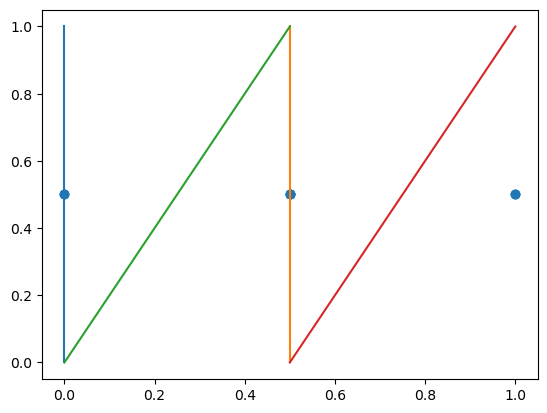

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1170d8c2d0>

In [12]:
scatter(vv[1],vv[2])
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")

🔵 Ahora busquemos puntos de periodo dos en la otra simetria. 

In [12]:
simetria4(x,y) = x-(y+1)/2.0

simetria4 (generic function with 1 method)

In [13]:
pp2 = periodicosN(EstandardMap,simetria1,simetria4,2,0.3)

2-element Array{Float64,1}:
 0.0
 0.433372460621069

In [14]:
Buscaperiodo(pp2,EstandardMap,1,1,1e-10)

periodo = 3.0

3.0

In [15]:
P1b = iterar(EstandardMap,pp2,10,1,1)

([0.0, 0.433372460621069, 0.5666275393789311, 0.0, 0.4333724606210689, 0.5666275393789304, 0.9999999999999961, 0.4333724606210798, 0.5666275393790026, 4.3520742565306136e-13, 0.4333724606198491], [0.433372460621069, 0.433372460621069, 0.13325507875786202, 0.4333724606210689, 0.4333724606210689, 0.13325507875786158, 0.4333724606210657, 0.4333724606210836, 0.1332550787579227, 0.4333724606214327, 0.43337246061941387])

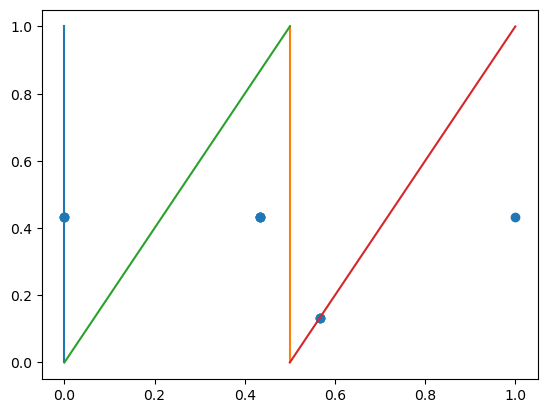

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f20abe79a50>

In [16]:
scatter(P1b[1],P1b[2])
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")

🔵 Ahora buscamos puntos que esten en la simetria 3 pero que despues de dos iteraciones caigan en la 1.

In [17]:
simetria3v(x,y) = [y/2,y]

simetria3v (generic function with 1 method)

In [18]:
simetria1f(x,y) = x

simetria1f (generic function with 1 method)

In [19]:
pp3 =periodicosN(EstandardMap, simetria3v,simetria1f,2,0.6)

2-element Array{Float64,1}:
 0.3397711121886404
 0.6795422243772808

In [20]:
Buscaperiodo(pp3,EstandardMap,1,1,1e-6)

periodo = 5.0

5.0

In [21]:
p3a = iterar(EstandardMap,pp3,15,1,1);

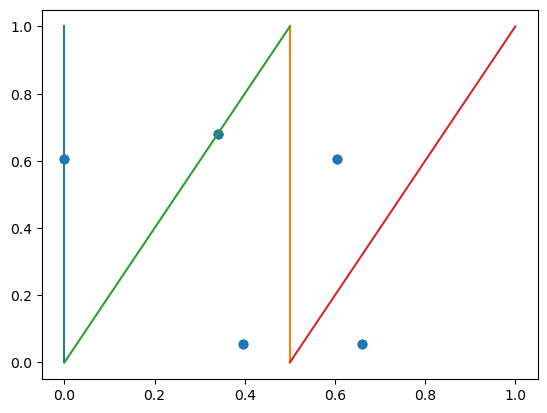

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f20abdfb510>

In [22]:
scatter(p3a[1],p3a[2])
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")

🔵 Ahora buscamos simetrias que esten en la simetria 3 pero que despues de dos iteraciones esten en la simetria 2. 

In [23]:
simetria2f(x,y) = x-1/2.0

simetria2f (generic function with 1 method)

In [24]:
pp4 = periodicosN(EstandardMap,simetria3v,simetria2f,2,0.7)

2-element Array{Float64,1}:
 0.35437747038895995
 0.7087549407779199

In [25]:
Buscaperiodo(pp4,EstandardMap,1,1,1e-6)

periodo = 5.0

5.0

In [26]:
p4d = iterar(EstandardMap,pp4,20,1,1)

([0.35437747038895995, 0.4780158461089852, 0.4999999999999997, 0.5219841538910128, 0.6456225296110274, 0.35437747038890066, 0.4780158461087115, 0.4999999999982542, 0.5219841538796983, 0.645622529538159  …  0.4780158445371614, 0.4999999899751664, 0.5219840889108349, 0.6456221111220566, 0.3543755145917271, 0.47800682060163147, 0.49994243697298874, 0.5216110349269443, 0.6432192702954993, 0.3430794221269782], [0.7087549407779199, 0.12363837572002523, 0.021984153891014546, 0.021984153891013145, 0.12363837572001456, 0.7087549407778732, 0.12363837571981073, 0.021984153889542682, 0.02198415388144413, 0.1236383756584607  …  0.12363837448880866, 0.02198414543800503, 0.02198409893566849, 0.1236380222112217, 0.7087534034696704, 0.12363130600990446, 0.02193561637135727, 0.021668597953955496, 0.12160823536855503, 0.699860151831479])

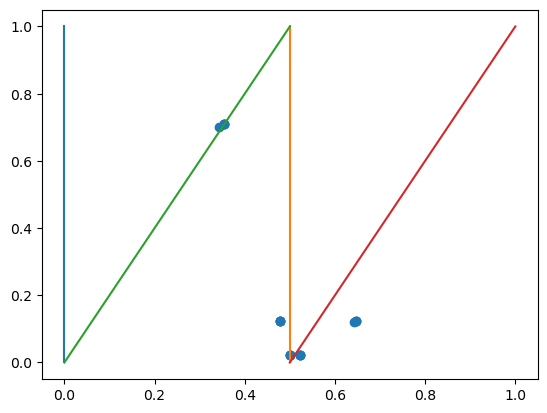

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f20abd70a50>

In [27]:
scatter(p4d[1],p4d[2])
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")

🔵 Busquemos puntos de periodo mayor.

In [28]:
pe3 = periodicosN(EstandardMap,simetria1,simetria2f,3,0.5)
pe4 = periodicosN(EstandardMap,simetria1,simetria2f,4,0.4)
pe5 = periodicosN(EstandardMap,simetria1,simetria2f,5,0.7)
pe6 = periodicosN(EstandardMap,simetria1,simetria2f,6,0.1)
pe7 = periodicosN(EstandardMap,simetria1,simetria2f,7,0.6)

2-element Array{Float64,1}:
 0.0
 0.4231267360498045

In [29]:
periodop3 = Buscaperiodo(pe3,EstandardMap,1,1,1e-5)

periodo = 6.0

6.0

In [50]:
periodop4 = Buscaperiodo(pe4,EstandardMap,1,1,1e-4)


periodo = 16.0

16.0

In [31]:
periodop5 = Buscaperiodo(pe5,EstandardMap,1,1,1e-5)


periodo = 20.0

20.0

In [32]:
periodop6 = Buscaperiodo(pe6,EstandardMap,1,1,1e-5)


periodo = 12.0

12.0

In [33]:
periodop7 = Buscaperiodo(pe7,EstandardMap,1,1,1e-5)

periodo = 14.0

14.0

In [34]:
p3e = iterar(EstandardMap,pe3,20,1,1)
p4e = iterar(EstandardMap,pe4,20,1,1)
p5e = iterar(EstandardMap,pe5,20,1,1)
p6e = iterar(EstandardMap,pe6,20,1,1)
p7e = iterar(EstandardMap,pe7,20,1,1);


In [35]:
p7e[1]

21-element Array{Float64,1}:
 0.0
 0.4231267360498045
 0.5033649273133013
 0.5992108913952038
 0.12603689835063836
 0.12743416799708407
 0.5988698271160969
 0.5000000000000271
 0.4011301728840826
 0.8725658320038978
 0.8739631016479756
 0.40078910860555883
 0.49663507269248214
 0.576873263987821
 2.240350127635793e-10
 0.42312673542101464
 0.5033649232485853
 0.5992108650437202
 0.12603675046555418
 0.12743438048095423
 0.5988697137488899

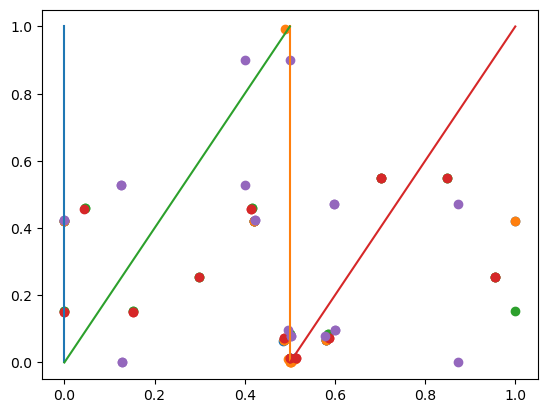

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f20abe12d90>

In [36]:
scatter(p3e[1],p3e[2])
 scatter(p4e[1],p4e[2])
scatter(p5e[1],p5e[2])
 scatter(p6e[1],p6e[2])
 scatter(p7e[1],p7e[2])
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")

In [37]:
function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo

    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #

    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)

        push!(iteradosMapX,F[1])
        push!(iteradosMapY,F[2])

        #x_ini = [F[1],F[2]]
        
       x = F[1]
       y = F[2]

    end

    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del

end

function GraficarEstandarMap(f)
    n = 50
    #s=2*pi/14.
    s = 1/20.
    i=0.
    for p_i=0:s:1
        for x_i =0:s:1
            i=i+1
            x_ini=[p_i,x_i]
            a,b = IterarMap(f,x_ini,n)
            p = scatter(a,b,marker=".",s=0.1,color="gray")
            
        end
    end

end

GraficarEstandarMap (generic function with 1 method)

In [38]:
function Estandar(x::Any,y::Any,k::Real)
    x_n =mod(x+y-k*sin(2*pi*x)/2pi,1)
    y_n =mod(y-k*sin(2*pi*x)/2pi,1)
    return [x_n,y_n]
end

Estandar (generic function with 1 method)

In [39]:
Estandar0(x,y)=Estandar(x,y,0.97)

Estandar0 (generic function with 1 method)

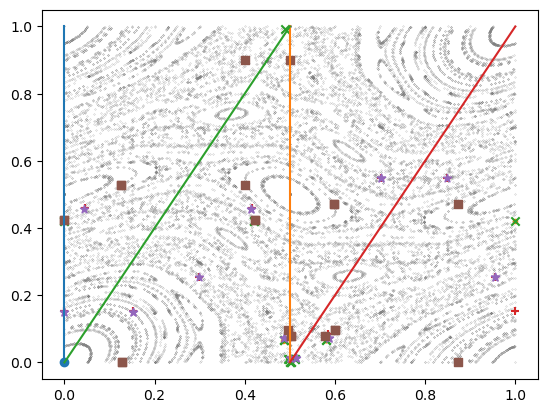

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f20a78d2890>

In [54]:
GraficarEstandarMap(Estandar0)
scatter([0],[0])
scatter(p3e[1],p3e[2],marker=".")
scatter(p4e[1],p4e[2],marker="x")
scatter(p5e[1],p5e[2],marker="+")
scatter(p6e[1],p6e[2],marker="*")
scatter(p7e[1],p7e[2],marker=",")
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")
#xlim((0,1))
#ylim((0,1))

🔵 Podemos buscar puntos de periodo mayor. 

In [41]:
pe_s = periodicosN(EstandardMap,simetria1,simetria2f,100,0.8)

2-element Array{Float64,1}:
 0.0
 0.8000097111556403

In [42]:
Buscaperiodo(pe_s,EstandardMap,1,1,1e-2)

periodo = 10.0

10.0

In [43]:
pesL = iterar(EstandardMap,pe_s,30,1,1);

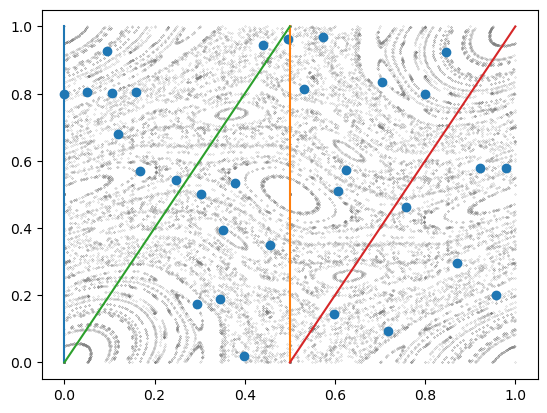

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f20aaf4bf10>

In [44]:
GraficarEstandarMap(Estandar0)
scatter(pesL[1],pesL[2])
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")

🔵 Podemos buscar tambien puntos usando presición extendida. 

In [45]:
peBF = periodicosN(EstandardMap,simetria1,simetria2f,50,BigFloat(0.8))

2-element Array{BigFloat,1}:
 0.0
 0.7999999999999949049507966897659585244729206455238854057436718379588478886852912

In [46]:
Buscaperiodo(peBF,EstandardMap,1,1,1e-3)

periodo = 95.0

95.0

In [47]:
peBFL = iterar(EstandardMap,peBF,110,1,1);

In [48]:
peBFL[1][96]

0.9905179858821533240274778811885552362918885810824348138349963690057960418341556

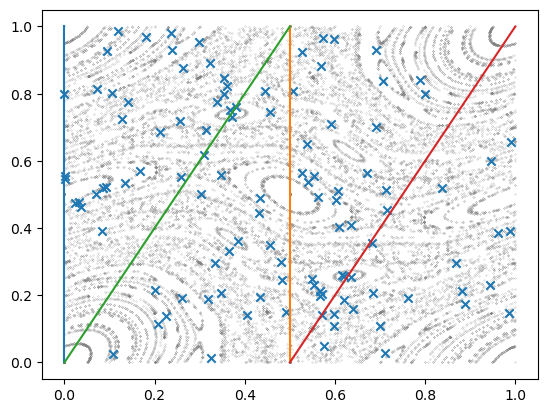

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f20aad567d0>

In [49]:
GraficarEstandarMap(Estandar0)
scatter(peBFL[1],peBFL[2],marker ="x")
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")